## Download de dependências

Este comando utiliza o gerenciador de pacotes `pip` para instalar um conjunto de bibliotecas Python essenciais para manipulação de dados, visualização, aprendizado de máquina e computação numérica. As bibliotecas instaladas são: `pandas` para estruturas de dados e ferramentas de análise de dados; `matplotlib` e `seaborn` para criação de gráficos estáticos, animados e interativos; `scikit-learn` para algoritmos de aprendizado de máquina; `tensorflow` para computação numérica e aprendizado de máquina em larga escala; e `plotly` para visualizações interativas.

In [1]:
!pip install pandas matplotlib seaborn scikit-learn tensorflow plotly

Defaulting to user installation because normal site-packages is not writeable


## Importar bibliotecas Python

Este trecho de código importa diversas bibliotecas e módulos Python essenciais para manipulação de dados, processamento de texto, aprendizado de máquina e visualização. São importados: `numpy` para operações numéricas; `pandas` para manipulação e análise de estruturas de dados; `plotly.express` para criação de visualizações interativas; e `re` para operações com expressões regulares. Do `tensorflow.keras`, são importados `Tokenizer` para converter texto em sequências numéricas e `pad_sequences` para garantir que essas sequências tenham o mesmo comprimento. Da biblioteca `sklearn.metrics`, são trazidos `classification_report`, `confusion_matrix`, e `ConfusionMatrixDisplay` para avaliação de modelos de classificação, e `matplotlib.pyplot` é importado para plotagem gráfica. Para divisão de dados e validação cruzada, são importados `train_test_split` e `KFold` de `sklearn.model_selection`. Finalmente, a biblioteca `tensorflow` é importada, geralmente referenciada como `tf`, para desenvolvimento e treinamento de modelos de aprendizado de máquina, especialmente redes neurais.

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold

import tensorflow as tf

2025-06-02 20:13:01.408135: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-02 20:13:01.530099: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-02 20:13:03.184484: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-02 20:13:04.016267: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748905984.730946    4643 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748905984.88

## Carregar dataset

Este segmento de código utiliza a biblioteca `pandas` para carregar dados de dois arquivos CSV distintos em DataFrames. O primeiro comando, `pd.read_csv('./kaggle/input/fake-and-real-news-dataset/True.csv')`, lê o arquivo `True.csv`, localizado no diretório especificado, e armazena seu conteúdo em um DataFrame chamado `true_df`. De forma análoga, o segundo comando, `pd.read_csv('./kaggle/input/fake-and-real-news-dataset/Fake.csv')`, carrega os dados do arquivo `Fake.csv` para um DataFrame denominado `fake_df`. Presume-se que estes arquivos contenham, respectivamente, notícias verdadeiras e falsas.

In [3]:
true_df = pd.read_csv('./kaggle/input/fake-and-real-news-dataset/True.csv')
fake_df = pd.read_csv('./kaggle/input/fake-and-real-news-dataset/Fake.csv')

## Adicionar nova coluna "label"

Este trecho de código adiciona uma nova coluna chamada `label` a dois DataFrames existentes, `true_df` e `fake_df`. Ao DataFrame `true_df`, é atribuído o valor inteiro `1` para todas as entradas nesta nova coluna `label`. De forma similar, ao DataFrame `fake_df`, é atribuído o valor inteiro `0` para todas as entradas na coluna `label`. Esta operação é tipicamente realizada para criar uma variável alvo em tarefas de classificação, distinguindo as amostras dos dois DataFrames (por exemplo, notícias verdadeiras e falsas).

In [4]:
true_df['label'] = 1
fake_df['label'] = 0

## Cominar DataFrames

Este trecho de código realiza a combinação e o embaralhamento de dois DataFrames, `true_df` e `fake_df`, utilizando a biblioteca `pandas`. Primeiramente, a função `pd.concat([true_df, fake_df])` une os dois DataFrames verticalmente, empilhando suas linhas para criar um único DataFrame consolidado. Subsequentemente, o método `.sample(frac=1, random_state=42)` é aplicado a este DataFrame combinado. O argumento `frac=1` especifica que todas as linhas do DataFrame devem ser selecionadas (ou seja, 100% da amostra), e `random_state=42` garante que a ordem do embaralhamento seja a mesma sempre que o código for executado, proporcionando reprodutibilidade. O DataFrame resultante, agora contendo os dados de ambos os DataFrames originais de forma aleatoriamente misturada, é atribuído à variável `df`.

In [5]:
df = pd.concat([true_df, fake_df]).sample(frac=1, random_state=42)

### Limpeza e pré-tratamento textual

Este trecho de código define uma função para limpeza de texto e, em seguida, a aplica a uma coluna de um DataFrame `pandas`. A função `clean_text` recebe uma string como entrada, converte todos os caracteres para minúsculas e utiliza expressões regulares (`re.sub`) para remover quaisquer caracteres que não sejam letras do alfabeto (maiúsculas ou minúsculas) ou espaços em branco. O resultado é uma versão simplificada do texto original, contendo apenas palavras e espaços. Subsequentemente, esta função `clean_text` é aplicada a cada elemento da coluna `text` do DataFrame `df`, e os textos resultantes, já limpos, são armazenados em uma nova coluna chamada `cleaned_text` dentro do mesmo DataFrame.

In [6]:
def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text.lower())
df['cleaned_text'] = df['text'].apply(clean_text)

## Tokenização e padronização

Este trecho de código transforma dados textuais da coluna `cleaned_text` de um DataFrame `df` em um formato numérico adequado para modelos de aprendizado de máquina, além de preparar os rótulos correspondentes. Primeiramente, são definidos os parâmetros `max_words` como 5000, limitando o vocabulário às palavras mais frequentes, e `max_len` como 200, estabelecendo o comprimento fixo das sequências de texto. Um objeto `Tokenizer` do Keras é então inicializado com `num_words=max_words` e `oov_token='<OOV>'`, que será usado para representar palavras fora do vocabulário. Este `tokenizer` é treinado com os textos da coluna `df['cleaned_text']`. Em seguida, os textos são convertidos em sequências de inteiros (`texts_to_sequences`), e essas sequências são padronizadas para o comprimento `max_len` através da função `pad_sequences`, resultando na matriz `X`. Por fim, os valores da coluna `label` do DataFrame são extraídos como um array NumPy e atribuídos à variável `y`.

In [7]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_text'])

sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=max_len)
y = df['label'].values

## Divisão do conjunto de dados

Este comando utiliza a função `train_test_split` da biblioteca `scikit-learn` para dividir os conjuntos de dados de características `X` e de rótulos `y` em subconjuntos de treinamento e teste. A divisão é configurada pelo parâmetro `test_size=0.4`, que especifica que 40% dos dados serão alocados para o conjunto de teste, enquanto os 60% restantes formarão o conjunto de treinamento. O argumento `random_state=42` é usado para garantir que a divisão seja feita da mesma maneira sempre que o código for executado, assegurando a reprodutibilidade dos resultados. Como resultado, são geradas quatro variáveis: `X_train` e `y_train` contendo as características e rótulos para treinamento do modelo, e `X_test` e `y_test` contendo as características e rótulos para avaliação do modelo.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Construção do modelo

Este trecho de código define e compila um modelo de rede neural utilizando a API funcional do Keras, projetado para tarefas de classificação binária de texto. Primeiramente, uma camada de entrada `text_input` é definida para receber sequências de texto com comprimento `max_len`. Essas sequências são então processadas por uma camada `Embedding` que mapeia cada palavra do vocabulário (`max_words`) para um vetor denso de 64 dimensões. A saída da camada de embedding é alimentada em uma camada `Bidirectional GRU` (Gated Recurrent Unit) com 32 unidades, que processa a sequência em ambas as direções para capturar o contexto. Para regularização e prevenção de overfitting, uma camada `Dropout` com taxa de 0.5 é aplicada, seguida por uma camada `Dense` com 32 unidades, ativação ReLU e regularização L2 (com fator de 0.01). A camada final é uma `Dense` com uma única unidade e ativação sigmoide, que produz a probabilidade para a classificação binária. O `tf.keras.Model` é então instanciado com as entradas e saídas definidas. Por fim, o modelo é compilado com o otimizador 'adam', a função de perda 'binary_crossentropy' (adequada para problemas de duas classes) e configurado para rastrear as métricas de 'accuracy' e 'AUC'. O comando `model.summary()` exibe um resumo da arquitetura do modelo, detalhando as camadas e o número de parâmetros.

In [9]:
text_input = tf.keras.Input(shape=(max_len,), name='text')
text_emb = tf.keras.layers.Embedding(input_dim=max_words, output_dim=64)(text_input)
text_out = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32))(text_emb)

dropout = tf.keras.layers.Dropout(0.5)(text_out)
dense = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=text_input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
model.summary()

2025-06-02 20:13:45.164200: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text (InputLayer)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        18,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 340,929 (1.30 MB)

 Trainable params: 340,929 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

## Treinamento do modelo

Este segmento de código executa o treinamento de um modelo Keras (`model`) previamente definido e compilado. São estabelecidos o tamanho do lote (`batch_size`) em 32 e o número de épocas (`epochs`) em 5. Uma lista de `callbacks` é configurada para otimizar o processo de treinamento: `tf.keras.callbacks.EarlyStopping` é usado para interromper o treinamento prematuramente se a métrica monitorada (geralmente a perda de validação) não melhorar após 2 épocas (`patience=2`), com a opção `restore_best_weights=True` para reter os pesos do modelo da melhor época. Adicionalmente, `tf.keras.callbacks.ReduceLROnPlateau` reduzirá a taxa de aprendizado pela metade (`factor=0.5`) se não houver melhora na métrica monitorada por 1 época (`patience=1`). O treinamento é iniciado chamando `model.fit()`, que utiliza os dados de treinamento `X_train` e `y_train`. Durante o treinamento, 20% dos dados de treinamento (`validation_split=0.2`) são automaticamente separados para validação. O processo utiliza o `batch_size`, `epochs` e `callbacks` especificados, e o histórico do treinamento (incluindo perdas e métricas por época) é armazenado na variável `history`.

In [10]:
batch_size = 32
epochs = 5

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=1)
]
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 94s 101ms/step - accuracy: 0.8550 - auc: 0.9263 - loss: 0.4450 - val_accuracy: 0.9715 - val_auc: 0.9949 - val_loss: 0.0997 - learning_rate: 0.0010
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 97s 108ms/step - accuracy: 0.9746 - auc: 0.9939 - loss: 0.0970 - val_accuracy: 0.9832 - val_auc: 0.9979 - val_loss: 0.0621 - learning_rate: 0.0010
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 95s 106ms/step - accuracy: 0.9898 - auc: 0.9987 - loss: 0.0446 - val_accuracy: 0.9854 - val_auc: 0.9985 - val_loss: 0.0481 - learning_rate: 0.0010
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 0.9916 - auc: 0.9993 - loss: 0.0347 - val_accuracy: 0.9908 - val_auc: 0.9977 - val_loss: 0.0402 - learning_rate: 0.0010
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 96s 107ms/step - accuracy: 0.9974 - auc: 0.9997 - loss: 0.0154 - val_accuracy: 0.9883 - val_auc: 0.9981 - val_loss: 0.0434 - learning_rate: 0.0010


## Visualização de resultados

Este trecho de código é dedicado à visualização do histórico de treinamento de um modelo e à avaliação de seu desempenho no conjunto de teste. Inicialmente, são gerados e exibidos dois gráficos de linha utilizando `plotly.express`: o primeiro mostra a evolução da perda de treinamento (`loss`) e de validação (`val_loss`) ao longo das épocas, e o segundo apresenta a evolução da métrica AUC (Área Sob a Curva ROC) de treinamento (`auc`) e de validação (`val_auc`). Em seguida, o código realiza previsões no conjunto de teste `X_test` utilizando o modelo treinado (`model.predict`). Essas previsões, que são probabilidades, são convertidas em rótulos de classe binários (0 ou 1) com base em um limiar de 0.5. Uma matriz de confusão é então calculada comparando os rótulos verdadeiros `y_test` com os rótulos previstos `y_pred`, e esta matriz é visualizada graficamente utilizando `ConfusionMatrixDisplay` e `matplotlib.pyplot`, com o título 'Matriz de Confusão'. Adicionalmente, um `classification_report` é impresso, fornecendo métricas detalhadas como precisão, recall e F1-score para as classes 'Fake' e 'True'. Por fim, o modelo é avaliado no conjunto de teste `X_test` e `y_test` através do método `model.evaluate()`, e os valores resultantes de precisão e AUC são impressos formatados.

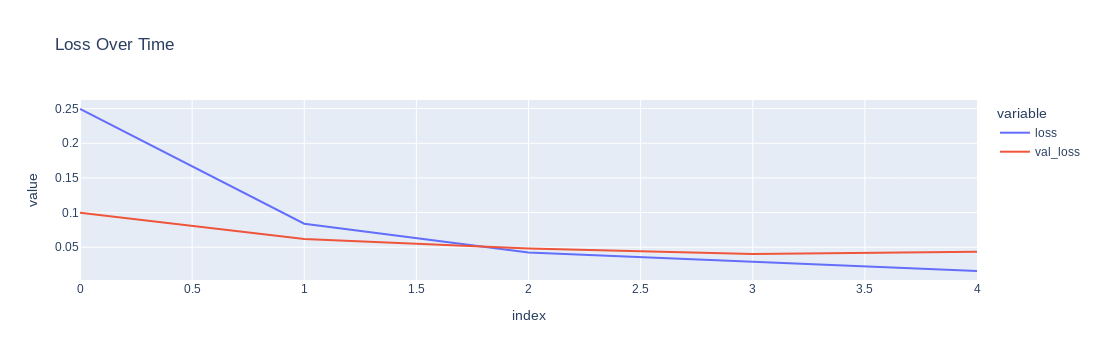

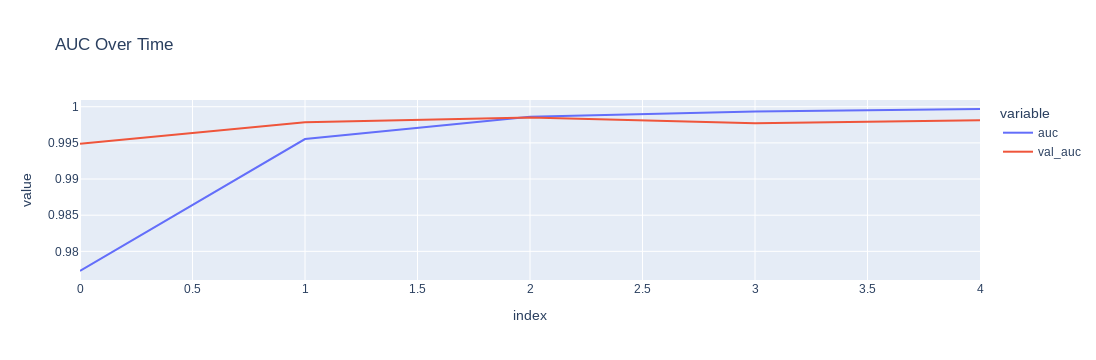

281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step


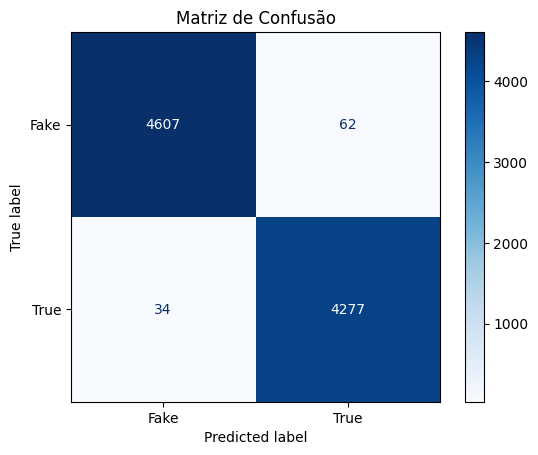

Relatório de Classificação:
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4669
        True       0.99      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9891 - auc: 0.9982 - loss: 0.0448
Precisão no conjunto de teste: 0.9893
AUC no conjunto de teste: 0.9986


In [11]:
fig = px.line(history.history, y=['loss', 'val_loss'], labels={'x': "Epoch", 'y': "Loss"}, title="Loss Over Time")
fig.show()
fig = px.line(history.history, y=['auc', 'val_auc'], labels={'x': "Epoch", 'y': "AUC"}, title="AUC Over Time")
fig.show()

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

print("Relatório de Classificação:\n", classification_report(y_test, y_pred, target_names=['Fake', 'True']))
test_results = model.evaluate(X_test, y_test)
print(f"Precisão no conjunto de teste: {test_results[1]:.4f}")
print(f"AUC no conjunto de teste: {test_results[2]:.4f}")

## Validação cruzada K-Fold

Este trecho de código implementa um procedimento de validação cruzada k-fold para treinar e avaliar um modelo de rede neural. Inicialmente, são definidos os parâmetros de configuração: `k` (número de folds) como 5, `epochs` como 5, `batch_size` como 32, `vocab_size` (tamanho do vocabulário) como 10000, `embedding_dim` (dimensão da camada de embedding) como 100 e `max_len` (comprimento máximo da sequência) como 200. Um objeto `KFold` da biblioteca `scikit-learn` é inicializado para dividir os dados em `k` subconjuntos (folds), com embaralhamento (`shuffle=True`) e um estado aleatório (`random_state=42`) para garantir a reprodutibilidade das divisões.

O código então entra em um loop que itera `k` vezes, uma para cada fold. Em cada iteração, o fold atual é impresso. Os dados de treinamento (`X_train`, `y_train`) são divididos em conjuntos de treinamento (`X_train_cv`, `y_train_cv`) e validação (`X_val_cv`, `y_val_cv`) específicos para o fold corrente. Um novo modelo sequencial do Keras (`tf.keras.Sequential`) é construído em cada fold, composto por uma camada `Embedding`, uma camada `Bidirectional GRU` que retorna sequências, uma camada `Dropout` (com taxa de 0.3), uma camada `GlobalAveragePooling1D` para reduzir a dimensionalidade temporal, uma camada `Dense` com ativação ReLU, outra camada `Dropout` (com taxa de 0.3), e uma camada `Dense` final com ativação sigmoide para classificação binária.

Este modelo recém-criado é compilado utilizando o otimizador 'adam', a função de perda 'binary_crossentropy' e a métrica de 'accuracy'. Em seguida, o modelo é treinado (`model.fit`) com os dados de treinamento do fold (`X_train_cv`, `y_train_cv`), utilizando os dados de validação do fold (`X_val_cv`, `y_val_cv`) para monitoramento, com `verbose=1` para exibir o progresso. Após o treinamento, são feitas previsões no conjunto de validação do fold, convertidas para inteiros (0 ou 1) com um limiar de 0.5, e um `classification_report` é impresso para avaliar o desempenho do modelo naquele fold específico. Por fim, o contador `fold` é incrementado para a próxima iteração.

In [12]:
k = 5
epochs = 5
batch_size = 32
max_words_gru = 5000  
embedding_dim_gru = 64
max_len_gru = 200

kfold = KFold(n_splits=k, shuffle=True, random_state=42)

fold_results_gru = []

fold = 1
print("Iniciando Validação Cruzada para o modelo GRU...")
for train_idx, val_idx in kfold.split(X_train, y_train):
    print(f"\n📘 Fold {fold}")

    X_train_cv, X_val_cv = X_train[train_idx], X_train[val_idx]
    y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]

    text_input_cv = tf.keras.Input(shape=(max_len_gru,), name=f'text_input_fold_{fold}')
    text_emb_cv = tf.keras.layers.Embedding(input_dim=max_words_gru, output_dim=embedding_dim_gru, name=f'embedding_fold_{fold}')(text_input_cv)
    text_out_cv = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, name=f'bigru_fold_{fold}'))(text_emb_cv)
    
    dropout_cv = tf.keras.layers.Dropout(0.5, name=f'dropout_fold_{fold}')(text_out_cv)
    dense_cv = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), name=f'dense_fold_{fold}')(dropout_cv)
    output_cv = tf.keras.layers.Dense(1, activation='sigmoid', name=f'output_fold_{fold}')(dense_cv)
    
    model_cv_gru = tf.keras.Model(inputs=text_input_cv, outputs=output_cv, name=f'GRU_Fold_{fold}')

    model_cv_gru.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    print(f"Treinando Fold {fold}...")
    history_cv_gru = model_cv_gru.fit(X_train_cv, y_train_cv,
                                      epochs=epochs,
                                      batch_size=batch_size,
                                      validation_data=(X_val_cv, y_val_cv),
                                      verbose=1)

    print(f"\nAvaliando Fold {fold} no conjunto de validação do fold:")
    results_val_fold = model_cv_gru.evaluate(X_val_cv, y_val_cv, verbose=0)
    print(f"Fold {fold} - Val Loss: {results_val_fold[0]:.4f}, Val Accuracy: {results_val_fold[1]:.4f}, Val AUC: {results_val_fold[2]:.4f}")
    
    y_pred_cv = (model_cv_gru.predict(X_val_cv) > 0.5).astype("int32")
    print(f"\nRelatório de Classificação para o Fold {fold} (no conjunto de validação do fold):\n")
    print(classification_report(y_val_cv, y_pred_cv, target_names=['Fake', 'True']))
    
    fold_results_gru.append({
        'fold': fold,
        'val_loss': results_val_fold[0],
        'val_accuracy': results_val_fold[1],
        'val_auc': results_val_fold[2],
        'classification_report': classification_report(y_val_cv, y_pred_cv, target_names=['Fake', 'True'], output_dict=True)
    })
    
    fold += 1

print("\n--- Resultados da Validação Cruzada K-Fold para GRU (média) ---")
avg_val_loss = np.mean([res['val_loss'] for res in fold_results_gru])
avg_val_accuracy = np.mean([res['val_accuracy'] for res in fold_results_gru])
avg_val_auc = np.mean([res['val_auc'] for res in fold_results_gru])

print(f"Média Val Loss: {avg_val_loss:.4f}")
print(f"Média Val Accuracy: {avg_val_accuracy:.4f}")
print(f"Média Val AUC: {avg_val_auc:.4f}")

Iniciando Validação Cruzada para o modelo GRU...

📘 Fold 1
Treinando Fold 1...
Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 112s 121ms/step - accuracy: 0.8841 - auc: 0.9410 - loss: 0.4133 - val_accuracy: 0.9694 - val_auc: 0.9952 - val_loss: 0.1056
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 0.9774 - auc: 0.9949 - loss: 0.0862 - val_accuracy: 0.9801 - val_auc: 0.9978 - val_loss: 0.0713
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 93s 103ms/step - accuracy: 0.9877 - auc: 0.9975 - loss: 0.0553 - val_accuracy: 0.9819 - val_auc: 0.9974 - val_loss: 0.0647
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 95s 105ms/step - accuracy: 0.9951 - auc: 0.9994 - loss: 0.0274 - val_accuracy: 0.9832 - val_auc: 0.9981 - val_loss: 0.0538
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 95s 106ms/step - accuracy: 0.9936 - auc: 0.9993 - loss: 0.0285 - val_accuracy: 0.9875 - val_auc: 0.9983 - val_loss: 0.0494

Avaliando Fold 1 no conjunto de validação do fold:
Fold 1 - Val Loss: 0.0494, Val Accuracy: 0.9875, Val AUC: 